In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Trainfile.csv')
dataset.drop(["Idx"], axis = 1, inplace= True)

In [3]:
dataset_test = pd.read_csv('Testfile.csv')
dataset_test.drop(["Idx"], axis = 1, inplace= True)

In [4]:
dataset[["LotFrontage","MasVnrArea"]]=dataset[["LotFrontage","MasVnrArea"]].fillna(dataset[["LotFrontage","MasVnrArea"]].mean()) 

In [5]:
dataset_test[["LotFrontage","MasVnrArea"]]=dataset_test[["LotFrontage","MasVnrArea"]].fillna(dataset_test[["LotFrontage","MasVnrArea"]].mean())

In [6]:
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)
dataset_test["GarageYrBlt"] = dataset_test["GarageYrBlt"].fillna(0)

In [7]:
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtypes == object:
        codes,uniques = pd.factorize(dataset.iloc[:,i])
        codes = tuple(x+1 for x in codes)
        dataset.iloc[:,i] = codes 
        
for i in range(len(dataset_test.columns)):
    if dataset_test[dataset_test.columns[i]].dtypes == object:
        codes,uniques = pd.factorize(dataset_test.iloc[:,i])
        codes = tuple(x+1 for x in codes)
        dataset_test.iloc[:,i] = codes    

In [8]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,1,59.000000,7227,1,0,1,1,1,1,1,1,1,1,1,1,6,6,1954,1954,1,1,1,1,1,0.0,1,1,1,1,1,1,1,0,1,0,832,832,1,1,1,1,832,0,0,832,0,0,1,0,2,1,1,4,1,0,0,1,1962.0,1,2,528,1,1,1,0,0,0,0,0,0,0,0,0,0,6,2008,1,1,105500
1,60,1,70.484009,12227,1,0,2,2,1,1,2,2,2,1,1,2,6,7,1977,1995,1,1,2,2,2,424.0,1,2,1,2,2,1,2,896,1,0,434,1330,1,2,1,1,1542,1330,0,2872,1,0,2,1,4,1,2,11,1,1,1,2,1977.0,2,2,619,1,1,1,550,282,0,0,0,0,0,0,0,0,7,2008,1,1,272000
2,20,1,65.000000,7800,1,0,1,2,1,2,2,3,3,1,1,3,5,7,1967,2004,2,1,2,2,2,89.0,1,1,2,1,1,1,2,450,1,0,414,864,1,3,1,1,899,0,0,899,0,0,1,0,3,1,1,5,1,0,0,2,1967.0,2,1,288,1,1,1,64,0,0,0,0,0,0,1,0,0,6,2009,1,1,130000
3,60,1,88.000000,12665,1,0,2,2,1,2,2,4,3,1,1,2,8,5,2005,2006,2,1,3,3,2,245.0,2,1,2,2,2,2,1,0,1,0,1094,1094,1,3,1,1,1133,1349,0,2482,0,0,2,1,4,1,1,9,1,1,2,3,2005.0,2,3,642,1,1,1,144,39,0,0,0,0,0,0,0,0,2,2007,1,1,281213
4,20,1,105.000000,15431,1,0,1,2,1,2,2,5,3,1,1,3,10,5,2008,2008,2,1,3,3,3,200.0,3,1,2,3,1,2,3,1767,2,539,788,3094,1,3,1,1,2402,0,0,2402,1,0,2,0,2,1,3,10,1,2,2,2,2008.0,2,3,672,1,1,1,0,72,0,0,170,0,0,0,0,0,4,2009,1,1,555000


In [9]:
d = np.zeros(len(dataset.columns)-1)
for i in range(len(dataset.columns)-1):
    d[i]=dataset.iloc[:,i].std()
dataset.rename(columns={'MSSubClass':'0','MSZoning':'1','LotFrontage':'2','LotArea':'3','Street':'4','Alley':'5','LotShape':'6','LandContour':'7','LotConfig':'8','LandSlope':'9','Neighborhood':'10','Condition1':'11','Condition2':'12','BldgType':'13','HouseStyle':'14','OverallQual':'15','OverallCond':'16','YearBuilt':'17','YearRemodAdd':'18','RoofStyle':'19','RoofMatl':'20','Exterior1st':'21','Exterior2nd':'22','MasVnrType':'23','MasVnrArea':'24','ExterQual':'25','ExterCond':'26','Foundation':'27','BsmtQual':'28','BsmtCond':'29','BsmtExposure':'30','BsmtFinType1':'31','BsmtFinSF1':'32','BsmtFinType2':'33','BsmtFinSF2':'34','BsmtUnfSF':'35','TotalBsmtSF':'36','Heating':'37','HeatingQC':'38','CentralAir':'39','Electrical':'40','1stFlrSF':'41','2ndFlrSF':'42','LowQualFinSF':'43','GrLivArea':'44','BsmtFullBath':'45','BsmtHalfBath':'46','FullBath':'47','HalfBath':'48','BedroomAbvGr':'49','KitchenAbvGr':'50','KitchenQual':'51','TotRmsAbvGrd':'52','Functional':'53','Fireplaces':'54','FireplaceQu':'55','GarageType':'56','GarageYrBlt':'57','GarageFinish':'58','GarageCars':'59','GarageArea':'60','GarageQual':'61','GarageCond':'62','PavedDrive':'63','WoodDeckSF':'64','OpenPorchSF':'65','EnclosedPorch':'66','3SsnPorch':'67','ScreenPorch':'68','PoolArea':'69','PoolQC':'70','Fence':'71','MiscFeature':'72','MiscVal':'73','MoSold':'74','YrSold':'75','SaleType':'76','SaleCondition':'77'}, inplace=True)
dataset_test.rename(columns={'MSSubClass':'0','MSZoning':'1','LotFrontage':'2','LotArea':'3','Street':'4','Alley':'5','LotShape':'6','LandContour':'7','LotConfig':'8','LandSlope':'9','Neighborhood':'10','Condition1':'11','Condition2':'12','BldgType':'13','HouseStyle':'14','OverallQual':'15','OverallCond':'16','YearBuilt':'17','YearRemodAdd':'18','RoofStyle':'19','RoofMatl':'20','Exterior1st':'21','Exterior2nd':'22','MasVnrType':'23','MasVnrArea':'24','ExterQual':'25','ExterCond':'26','Foundation':'27','BsmtQual':'28','BsmtCond':'29','BsmtExposure':'30','BsmtFinType1':'31','BsmtFinSF1':'32','BsmtFinType2':'33','BsmtFinSF2':'34','BsmtUnfSF':'35','TotalBsmtSF':'36','Heating':'37','HeatingQC':'38','CentralAir':'39','Electrical':'40','1stFlrSF':'41','2ndFlrSF':'42','LowQualFinSF':'43','GrLivArea':'44','BsmtFullBath':'45','BsmtHalfBath':'46','FullBath':'47','HalfBath':'48','BedroomAbvGr':'49','KitchenAbvGr':'50','KitchenQual':'51','TotRmsAbvGrd':'52','Functional':'53','Fireplaces':'54','FireplaceQu':'55','GarageType':'56','GarageYrBlt':'57','GarageFinish':'58','GarageCars':'59','GarageArea':'60','GarageQual':'61','GarageCond':'62','PavedDrive':'63','WoodDeckSF':'64','OpenPorchSF':'65','EnclosedPorch':'66','3SsnPorch':'67','ScreenPorch':'68','PoolArea':'69','PoolQC':'70','Fence':'71','MiscFeature':'72','MiscVal':'73','MoSold':'74','YrSold':'75','SaleType':'76','SaleCondition':'77'}, inplace=True)

In [10]:
for i in range(len(dataset.columns)-2):
    if (d[i]<=1) :
        dataset.drop([str(i)], inplace=True, axis=1) 
        dataset_test.drop([str(i)], inplace=True, axis=1) 

In [11]:
dataset=dataset.drop(['Utilities'] , axis=1)
dataset_test=dataset_test.drop(['Utilities'] , axis=1)
for i in range(len(dataset.columns)-1):
    dataset.iloc[:,i] = (dataset.iloc[:,i] - dataset.iloc[:,i].mean())/dataset.iloc[:,i].std()
    
for i in range(len(dataset_test.columns)-1):
    dataset_test.iloc[:,i] = (dataset_test.iloc[:,i] - dataset_test.iloc[:,i].mean())/dataset_test.iloc[:,i].std()    

In [12]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])
dataset.head()

,0,2,3,11,12,14,15,16,17,18,19,22,23,25,31,32,33,35,36,37,42,43,44,45,53,56,58,61,65,66,67,68,69,70,74,75,76,77,SalePrice
0,-0.296776,-5.063420e-01,-0.393466,-1.962931,-0.088254,-1.730382,-0.081216,0.361703,-0.559283,-1.493346,-0.442798,-1.115141,-0.728396,-0.698402,-1.058946,-0.973404,-0.281508,0.608600,-0.488216,-0.14181,-0.810448,-0.122993,-1.291637,-0.819625,-0.238463,-0.901091,-0.807703,-0.055573,-0.708058,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.121984,0.115245,-0.347209,-0.397459,11.566466
1,0.056007,-8.145430e-15,0.252298,-1.079301,-0.088254,-0.897750,-0.081216,1.260434,0.197590,0.495140,-0.442798,-0.748475,0.686134,-0.698402,-0.404722,1.006428,-0.281508,-0.290040,0.648244,-0.14181,2.223309,-0.122993,2.564943,1.107510,-0.238463,0.289898,0.251244,-0.055573,3.496037,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,0.245260,0.115245,-0.347209,-0.397459,12.513557
2,-0.884748,-2.417957e-01,-0.319461,-0.195672,-0.088254,-0.065118,-0.808965,1.260434,-0.131486,0.931636,1.337781,-0.748475,0.686134,-0.698402,-0.404722,0.020931,-0.281508,-0.335197,-0.415191,-0.14181,-0.810448,-0.122993,-1.164974,-0.819625,-0.238463,0.289898,0.251244,-0.055573,-0.708058,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.121984,0.868971,-0.347209,-0.397459,11.775290
3,0.056007,7.722985e-01,0.308867,-0.195672,-0.088254,-0.897750,1.374282,-0.537027,1.119001,1.028636,1.337781,-0.381809,0.686134,0.894346,-1.058946,-0.973404,-0.281508,1.200167,0.109681,-0.14181,2.266648,-0.122993,1.827656,-0.819625,-0.238463,1.480888,0.251244,-0.055573,-0.126641,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-1.590962,-0.638482,-0.347209,-0.397459,12.546868
4,-0.884748,1.521846e+00,0.666104,-0.195672,-0.088254,-0.065118,2.829780,-0.537027,1.217723,1.125635,1.337781,-0.381809,2.100663,2.487094,0.249502,2.931018,0.745274,0.509253,4.673779,-0.14181,-0.810448,-0.122993,1.676417,1.107510,-0.238463,0.289898,0.251244,-0.055573,0.365328,-0.367372,-0.117325,2.878633,-0.066045,-0.061294,-0.856473,0.868971,-0.347209,-0.397459,13.226723


In [13]:
X = dataset.iloc[:,0:38].values
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

X_test = dataset_test.iloc[:,0:38].values
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

y = dataset.iloc[:,38:39].values
y_test = dataset_test.iloc[:,38:39].values
theta = np.zeros([1,len(dataset.columns)])
print (y)

[[11.56646623]
 [12.51355735]
 [11.77528973]
 ...
 [11.94794938]
 [12.37370349]
 [12.10015642]]


In [14]:
def cost_func(X,y,theta):
    cost_ = np.power((np.dot(X , theta.T)-y),2)
    return np.sum(cost_)/(2 * len(X))

In [15]:
alpha = 0.01
iters = 2000
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.dot(X , theta.T) - y), axis=0)
        cost[i] = cost_func(X, y, theta)
    
    return theta,cost

thta,cost = gradientDescent(X,y,theta,iters,alpha)
Cost_value = cost_func(X,y,thta)
print(Cost_value)

0.010832992699983779


Text(0, 0.5, 'cost')

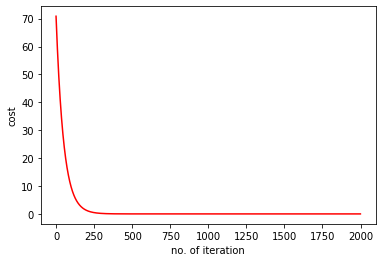

In [16]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('no. of iteration')  
ax.set_ylabel('cost')  

In [17]:
y_pred = np.dot(X_test,thta.T)
for i in range(322):
    y_pred[i] = np.exp(y_pred[i])
    
print (y_pred)    

[[117099.24270603]
 [153734.15777077]
 [221703.74243198]
 [170447.25255572]
 [ 92811.49732934]
 [301341.00557602]
 [152363.99826137]
 [184645.68927357]
 [236642.94192113]
 [165259.33367388]
 [ 78218.9312355 ]
 [125605.94608078]
 [370867.43069823]
 [281250.22430471]
 [117441.73643367]
 [161084.18304603]
 [195967.67341782]
 [131778.83574261]
 [118633.46098363]
 [206920.40397314]
 [360346.51567685]
 [271058.59829883]
 [173565.94556362]
 [241763.23557571]
 [129248.16681746]
 [123293.14412067]
 [163684.36496077]
 [124115.12171036]
 [211734.09225128]
 [123232.91789155]
 [277430.06276499]
 [125975.9778619 ]
 [190799.89321174]
 [145607.23418399]
 [170322.64372271]
 [181973.8762659 ]
 [131481.89080766]
 [298418.87857821]
 [154090.11437394]
 [ 85050.82121775]
 [113341.4001482 ]
 [182099.45955217]
 [106424.32485995]
 [293891.57459467]
 [147877.54447827]
 [231534.79417605]
 [113931.12558256]
 [130634.09109493]
 [142391.90625923]
 [146640.62712053]
 [319896.24071717]
 [218241.10961461]
 [ 73504.111

In [19]:
Mape = 0
for i in range(322):
    Mape += abs(y_pred[i]-y_test[i])/y_test[i]
    
accuracy = 100-Mape*100/322
print('Accuracy is', float(accuracy),'%')

Accuracy is 88.73404464773401 %
